# random forest model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('cardio_train.csv',sep=(';'))

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.shape

(70000, 13)

In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# how to remove duplicate

In [11]:
df.drop(['id'],axis=1,inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(69976, 12)

# remove outliers

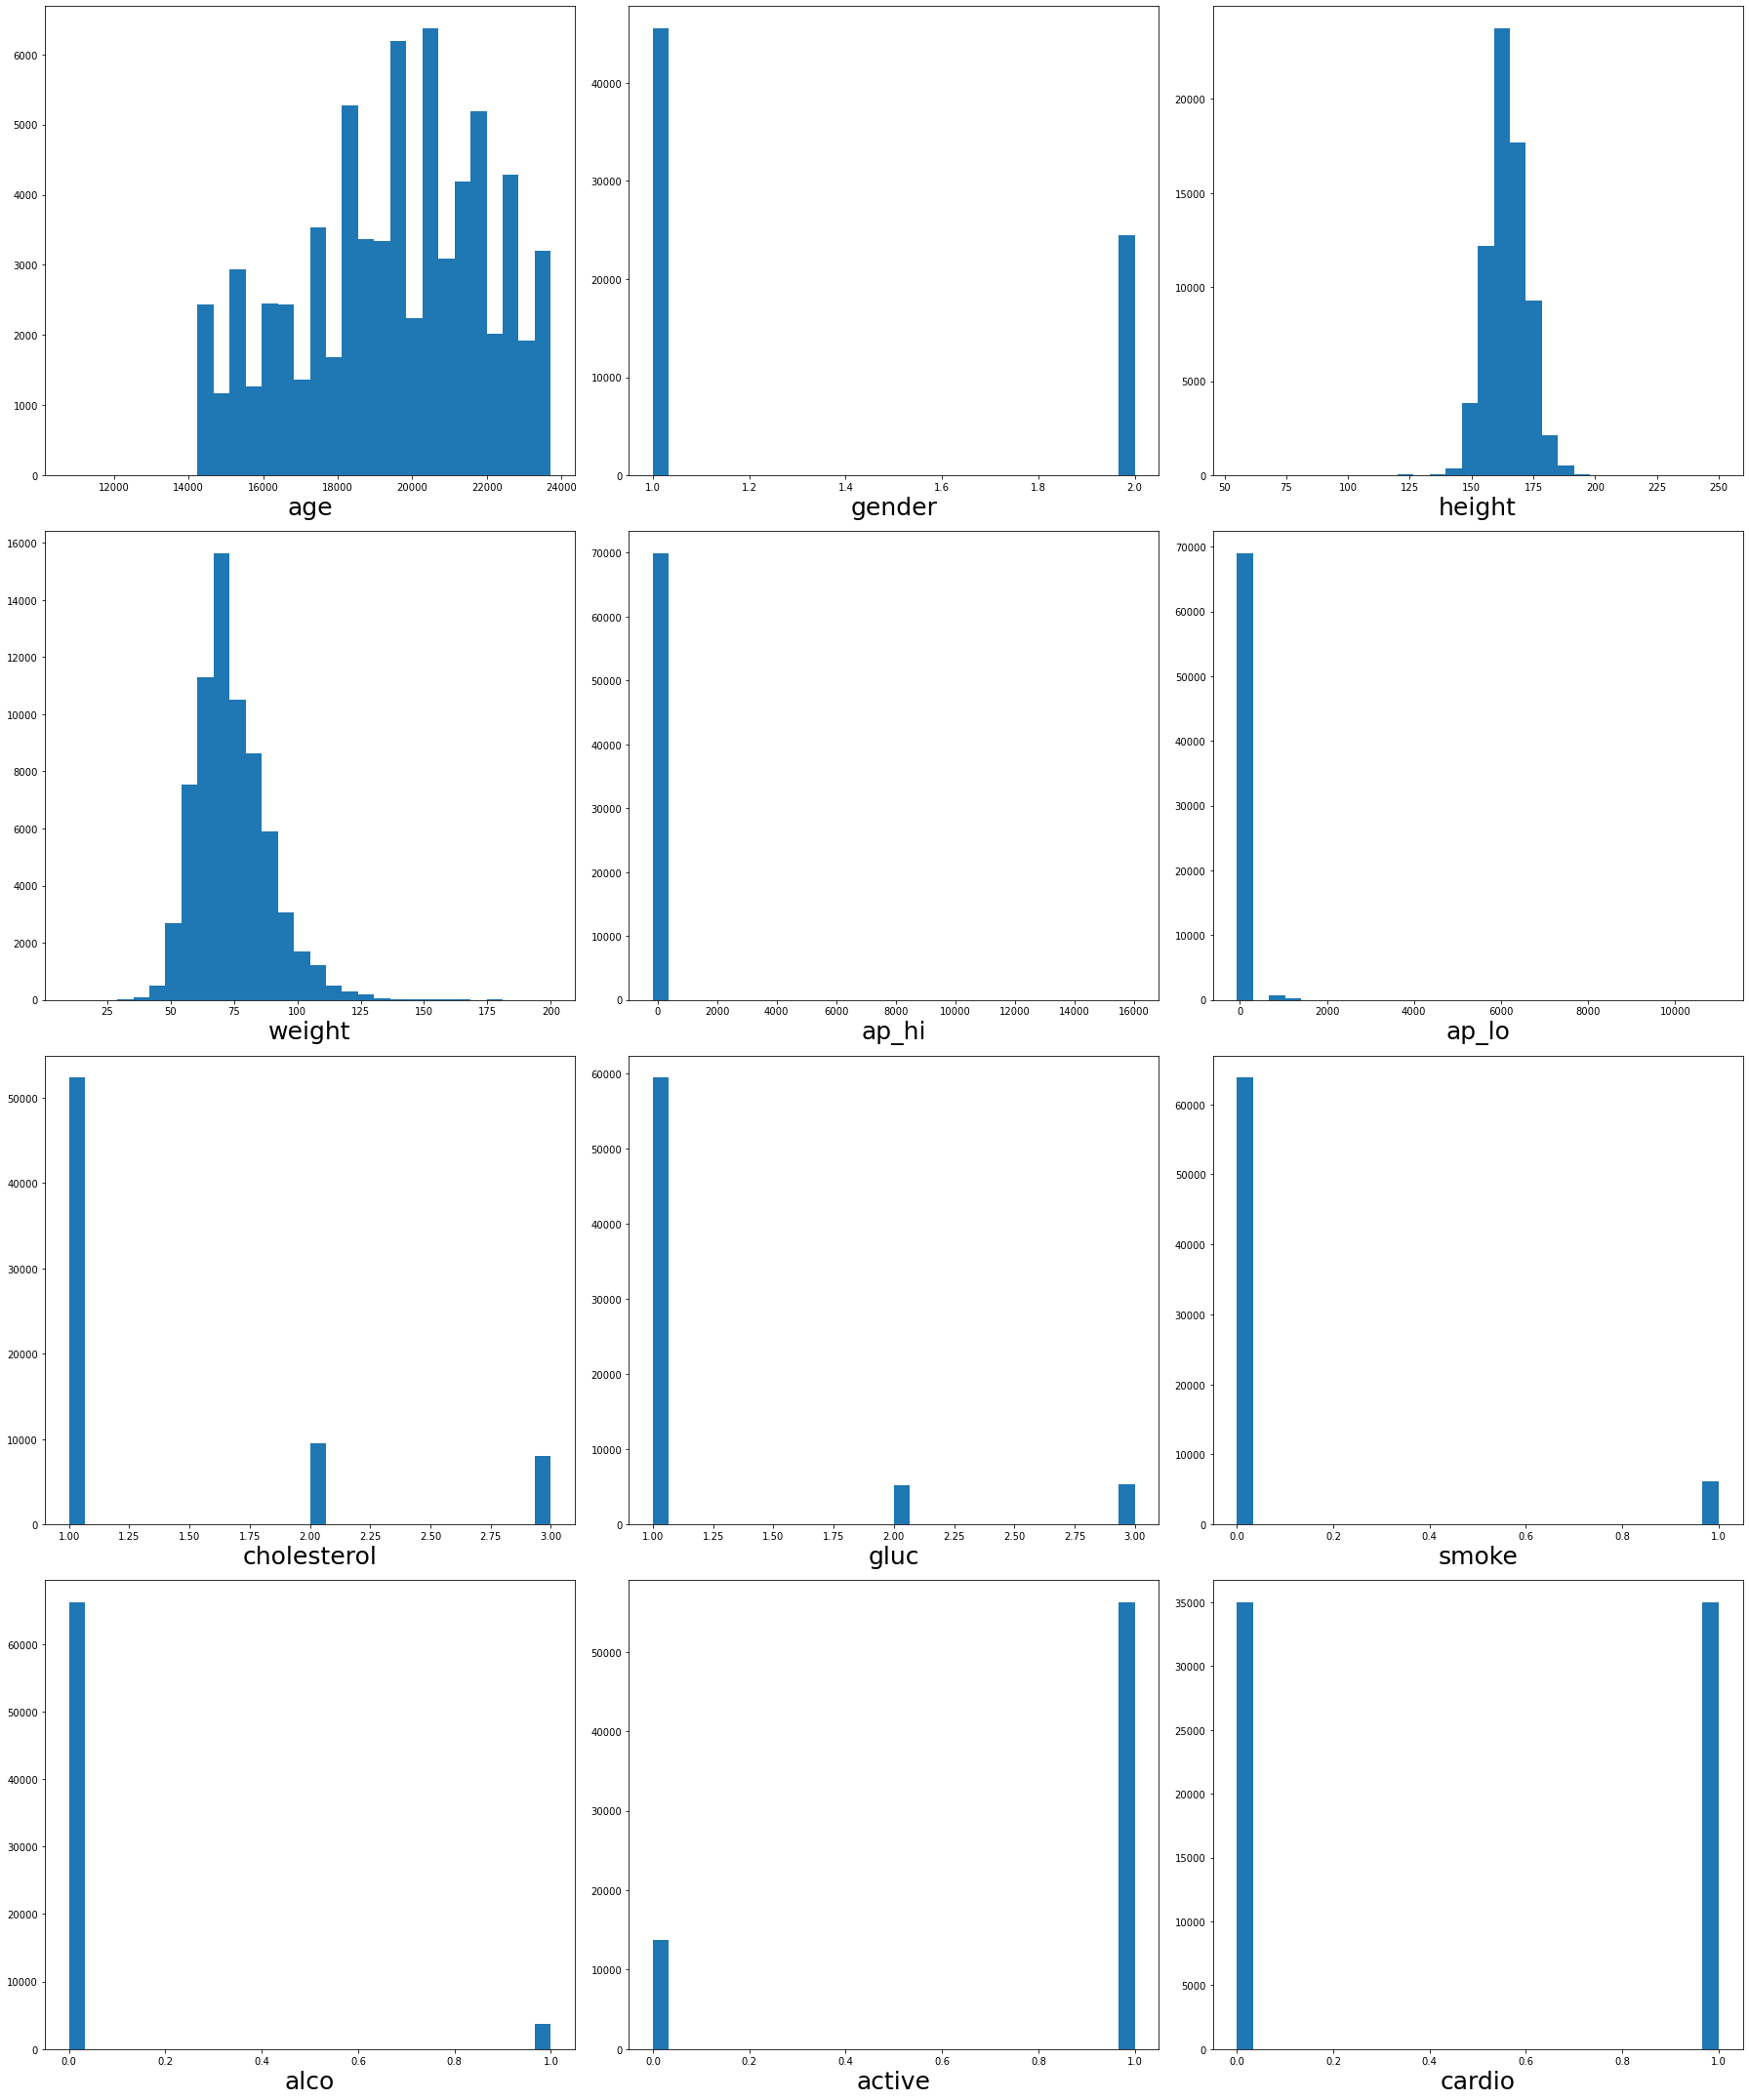

In [18]:
plt.figure(figsize=(25,30))

plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        
    plotnumber+=1
plt.tight_layout()

# z distribution

In [19]:
#3 std lets distribution
from scipy.stats import zscore

In [20]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [21]:
zscore = zscore(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])

abs_z_score = np.abs(zscore)

filtering_entry = (abs_z_score<3).all(axis=1)

df = df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000
mean,19466.951531,1.347339,164.372441,73.569152,126.173552,81.288053,1.362153,1.223609,0.087239,0.053187,0.803712,0.492938
std,2467.016002,0.476128,7.692655,13.202960,17.854738,10.235287,0.677132,0.569561,0.282187,0.224408,0.397192,0.499954
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


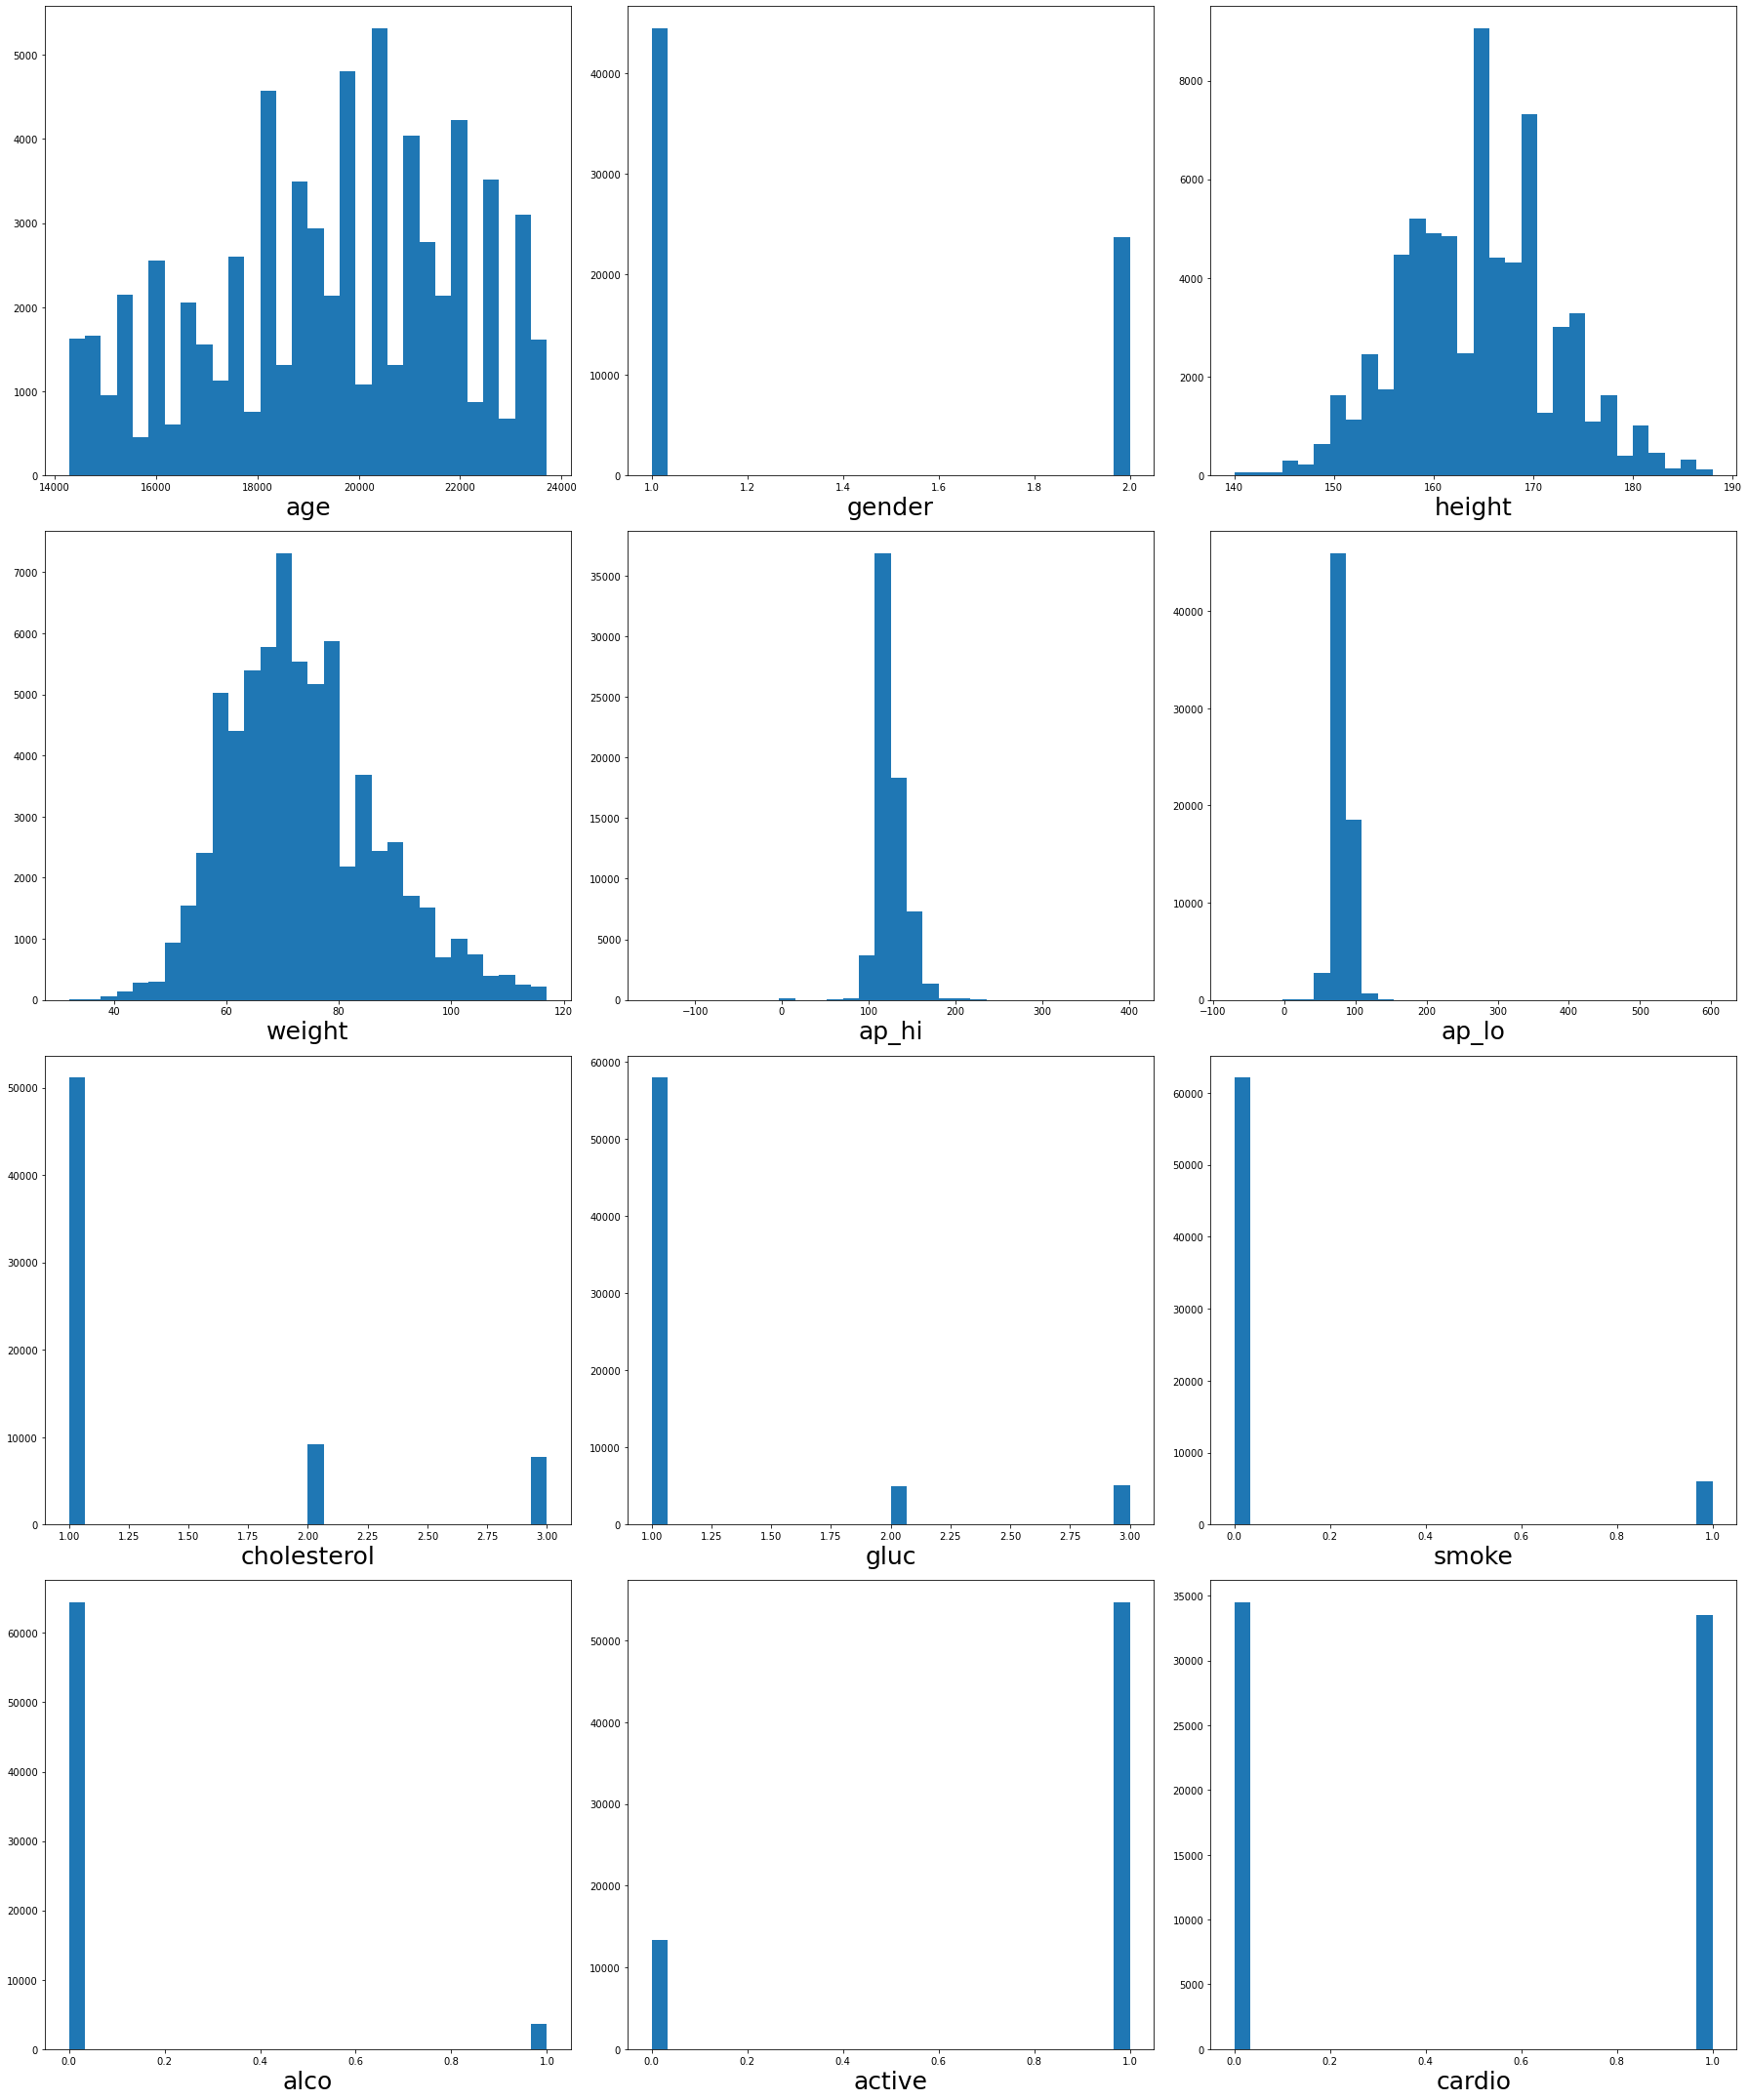

In [22]:
plt.figure(figsize=(25,30))

plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        
    plotnumber+=1
plt.tight_layout()

In [23]:
df.shape

(68043, 12)

In [24]:
x = df.drop(['cardio'],axis=1)
y = df['cardio']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=41)

clf = RandomForestClassifier()

In [26]:
param = ({'n_estimators':[13,15],
         'criterion':['entropy','gini'],
          'min_samples_split':[10,11],
    'min_samples_leaf':[5,6],
        'max_depth':[10,15] })

In [27]:
grid = GridSearchCV(estimator=clf,param_grid=param)

In [28]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [29]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 13}

In [30]:
clf = grid.best_estimator_

In [31]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=13)

In [32]:
y_pred = clf.predict(x_test)

In [33]:
print(confusion_matrix(y_test,y_pred))

[[8010 2276]
 [3188 6939]]


In [34]:
print(accuracy_score(y_test,y_pred))

0.7323274383970999


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10286
           1       0.75      0.69      0.72     10127

    accuracy                           0.73     20413
   macro avg       0.73      0.73      0.73     20413
weighted avg       0.73      0.73      0.73     20413



# lets roc auc curve

In [37]:
#plot roc auc for multiple model without hyper tunnig
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [38]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt =  DecisionTreeClassifier()
rf = RandomForestClassifier()

In [39]:
x = df.drop(['cardio'],axis=1)
y = df['cardio']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=41)

In [41]:
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
print('all model trained')

all model trained


In [42]:
lr.score(x_train,y_train)
kn.score(x_train,y_train)
dt.score(x_train,y_train)
rf.score(x_train,y_train)
print('all model tested')

all model tested


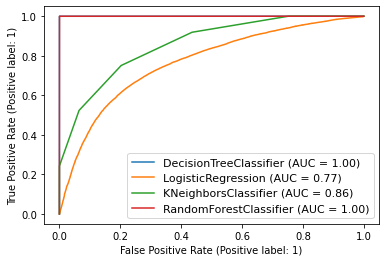

In [43]:
disp = plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc = 'lower right')

plt.show()

# true positve rate = higher to better

# false positive rate = lower the better

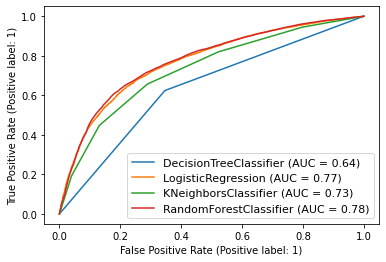

In [45]:
disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc = 'lower right')

plt.show()

# random forest good model for this data